In [1]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
from gradcam import VizGradCAM

2021-10-20 14:57:53.127149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-20 14:57:53.127202: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
IMG_SIZE = (28,28)
IMG_SHAPE = IMG_SIZE + (1,)

In [3]:
folder = 'img'
files = [f for f in os.listdir(folder) if 'png' in f or 'jpg' in f]

In [4]:
def check_reverse(img):
    dark = light = 0
    for x in np.nditer(img):
        if x < 127: dark += 1
        else: light += 1
    if dark > light: return True
    else: return False

In [5]:
# model = load_model('straight_bs200e30_tf25.h5')
model = load_model('es.h5')
# model = load_model('es4_zr.h5') # zoom_range=[1.3, 0.6], stopping=4
# model = load_model('es_func.h5')
# model = load_model('es_func_folder.h5')
# model = load_model('exp_short.h5')

2021-10-20 14:57:55.160407: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-20 14:57:55.160447: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-20 14:57:55.160481: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a): /proc/driver/nvidia/version does not exist
2021-10-20 14:57:55.160789: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
def predict(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
    if check_reverse(img): img = ~img  # ~ for inversed-img
    img = ~cv2.adaptiveThreshold(img,255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY,
#                                      99,10)
                                 19, 10)  # only this 100%
#                                    3,3)
    img = Image.fromarray(img)
    img = img.resize(IMG_SIZE, Image.ANTIALIAS)
    img = np.array(img)
    arr = img.reshape(1,IMG_SHAPE[0],IMG_SHAPE[1],1)/255
#     arr = img.reshape(1,IMG_SHAPE[0],IMG_SHAPE[1],1)  # for exp augm
    return np.argmax(model.predict(arr))

In [7]:
count = 0
for i in range(0, len(files)):
    if int(files[i][0]) == predict(os.path.join(folder, files[i])):
        count += 1
    else: 
        dig = files[i]
        print(dig)
        plt.imshow(cv2.imread(os.path.join(folder,dig)))
        plt.show()

2021-10-20 14:57:55.514964: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [8]:
print (count / len(files) * 100, '%')

100.0 %


In [9]:
files.sort()

In [10]:
for f in files:
    print(f, predict(os.path.join(folder, f)), sep='  ')

0.png  0
0i.png  0
0zero.png  0
1.png  1
1i.png  1
1one.png  1
1oneone.png  1
2.png  2
2i.png  2
2two.png  2
3.png  3
3i.png  3
3three.png  3
4.png  4
4four.png  4
4i.png  4
5.png  5
5b.png  5
5five.png  5
5i.png  5
5w.png  5
6.png  6
6i.png  6
6six.png  6
7.png  7
77.png  7
7i.png  7
7seven.png  7
8.png  8
8eight.png  8
8i.png  8
9.png  9
9i.png  9
9nine.png  9
9w.png  9


0


/home/a/Documents/recognition_of_my_handwritten_digits/gradcam.py:80: RuntimeWarning: invalid value encountered in true_divide
  activation_map = (activation_map - activation_map.min()) / (


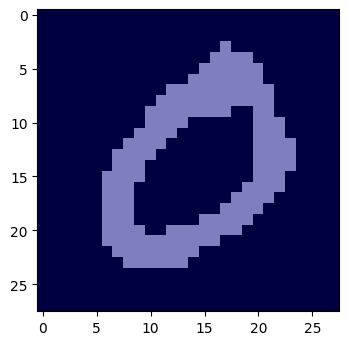

0


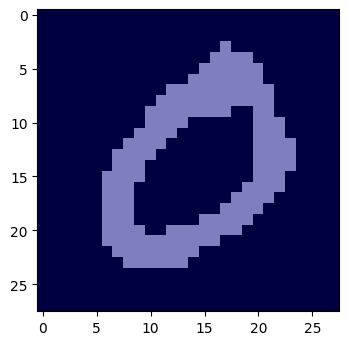

0


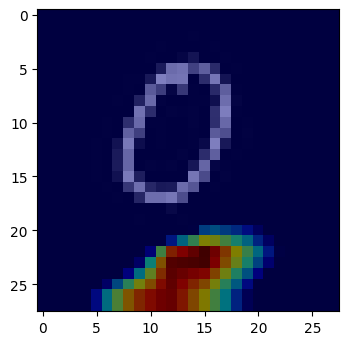

1


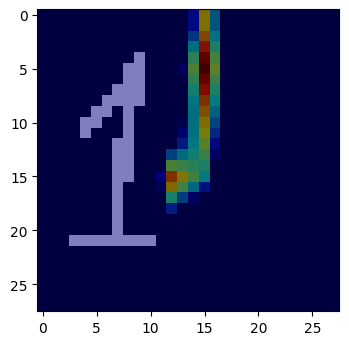

1


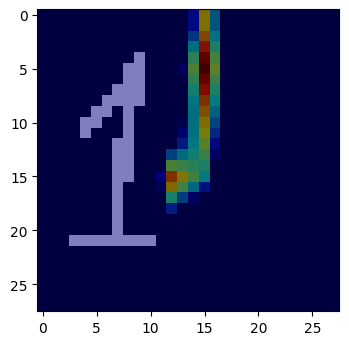

1


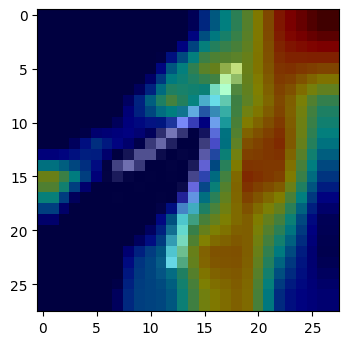

1


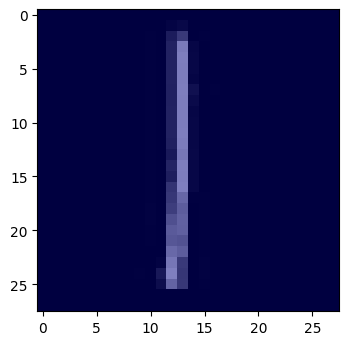

2


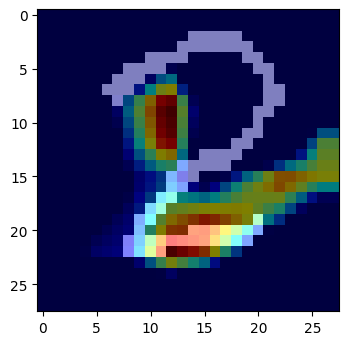

2


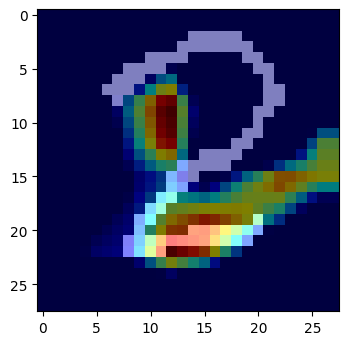

2


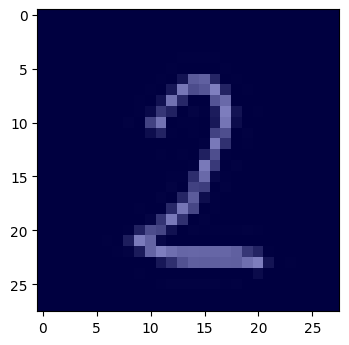

3


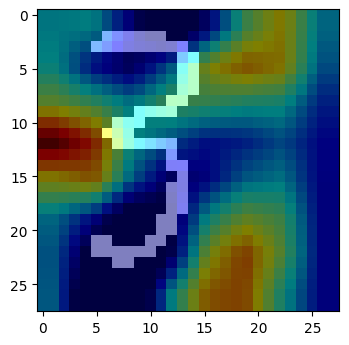

3


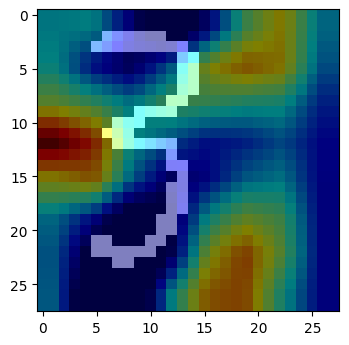

3


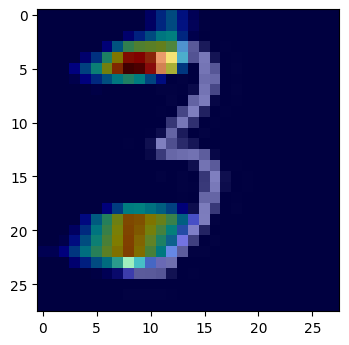

4


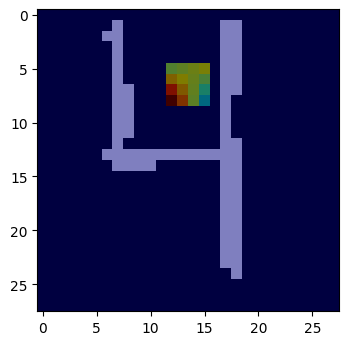

4


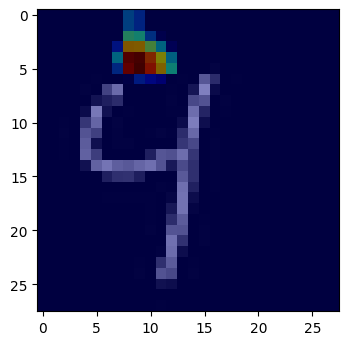

4


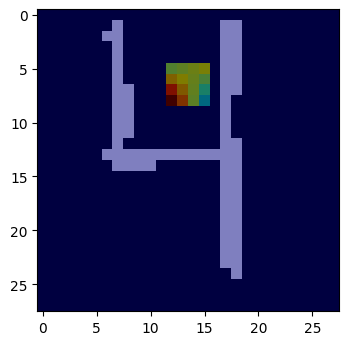

5


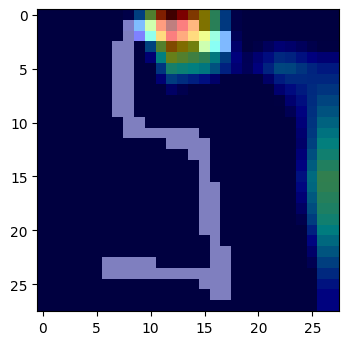

5


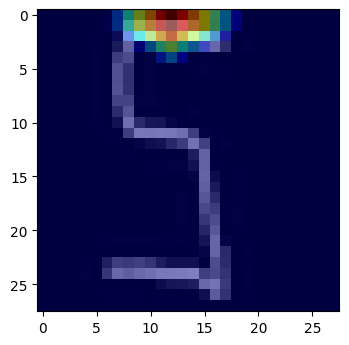

5


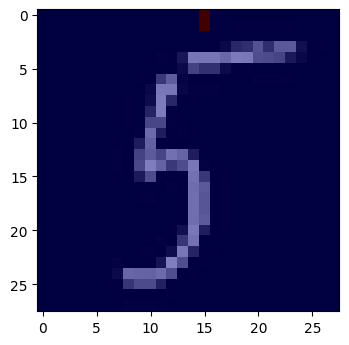

5


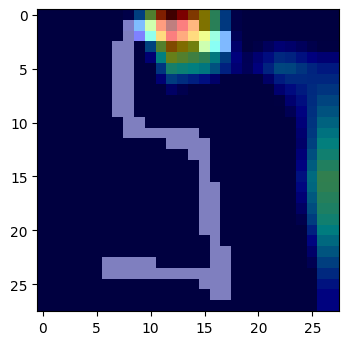

5


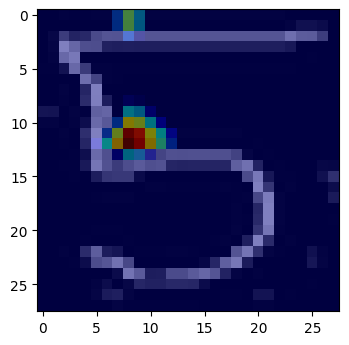

6


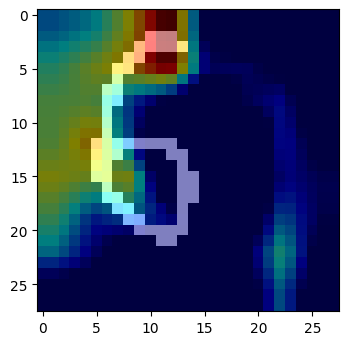

6


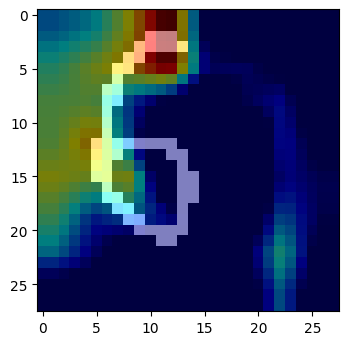

6


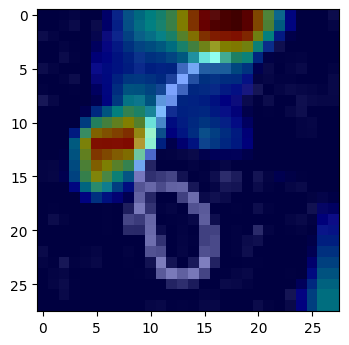

7


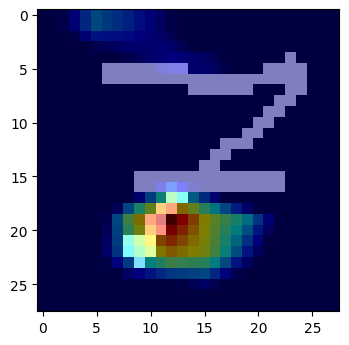

7


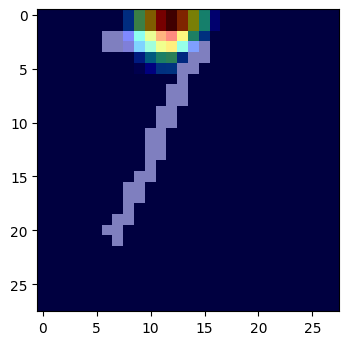

7


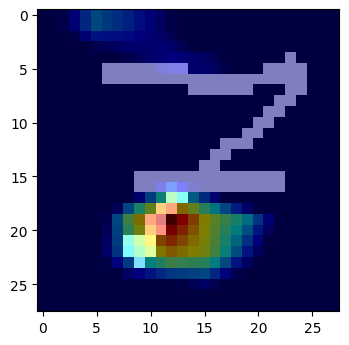

7


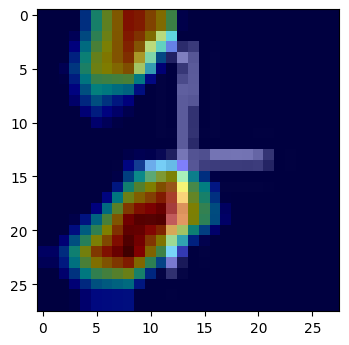

8


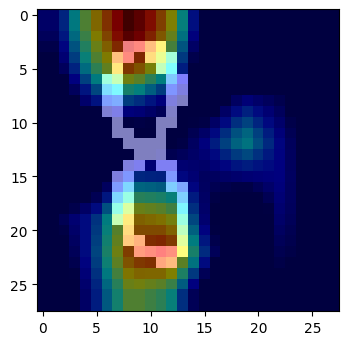

8


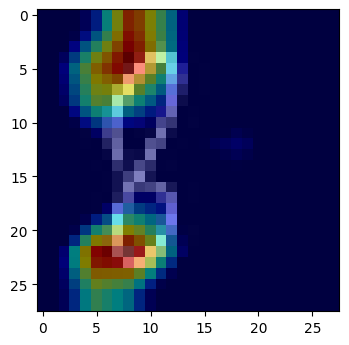

8


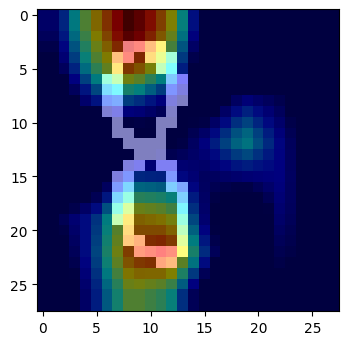

9


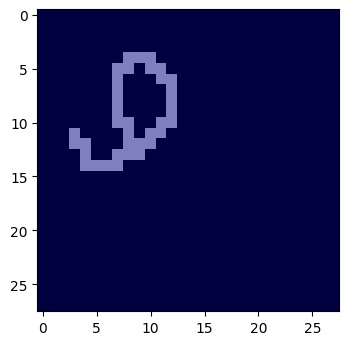

9


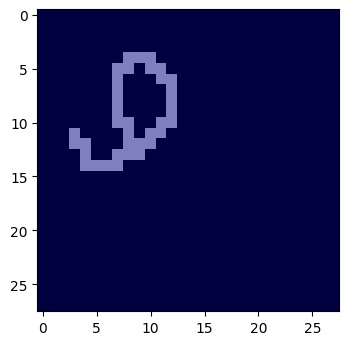

9


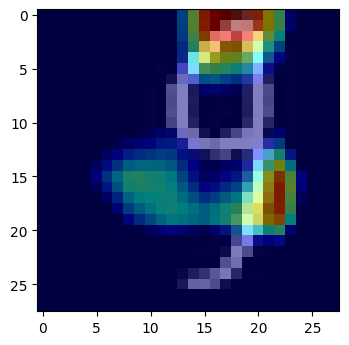

9


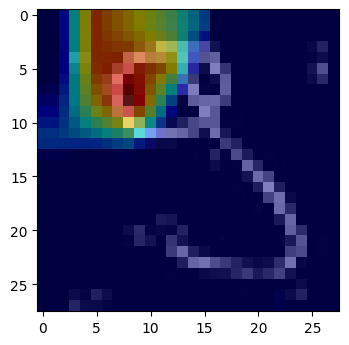

In [11]:
for f in files:
    img_path = os.path.join(folder, f)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
    if check_reverse(img): img = ~img  # ~ for inversed-img
    img = ~cv2.adaptiveThreshold(img,255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY,
#                                      99,10)
                                 19, 10)  # only this 100%
#                                    3,3)
    img = Image.fromarray(img)
    img = img.resize(IMG_SIZE, Image.ANTIALIAS)
    img = np.array(img)
    im = img.reshape(IMG_SHAPE[0],IMG_SHAPE[1],1)/255
#     im = img.reshape(28, 28, 1) # for exp augm
    VizGradCAM(
        model,
        im,
        # plot_results=False
        plot_results=True
    )
    plt.show()